<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI2_Trang28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Câu 1 trang 28
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Nguyễn Đức Trung_6351071072")
sns.set(style="whitegrid")
df = pd.read_csv('bank.csv', sep=';')

target_col = 'subscribe' if 'subscribe' in df.columns else 'y'
df['target_num'] = df[target_col].map({'yes': 1, 'no': 0})

print("--- 5 dòng đầu tiên ---")
print(df.head())

print("\n--- Thông tin tổng quan ---")
df.info()

print("\n--- Thống kê mô tả ---")
print(df.describe())

Nguyễn Đức Trung_6351071072
--- 5 dòng đầu tiên ---
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  cellular   19   oct        79         1     -1         0  unknown  no   
1  cellular   11   may       220         1    339         4  failure  no   
2  cellular   16   apr       185         1    330         1  failure  no   
3   unknown    3   jun       199         4     -1         0  unknown  no   
4   unknown    5   may       226         1     -1         0  unknown  no   

   target_num  
0           0  
1           0  
2   

In [3]:
#câu 2 trang 28
print("Nguyễn Đức Trung _ 6351071072")
df.replace('unknown', np.nan, inplace=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("\n--- 5 thuộc tính thiếu dữ liệu nhiều nhất ---")
print(missing_data.head(5))

Nguyễn Đức Trung _ 6351071072

--- 5 thuộc tính thiếu dữ liệu nhiều nhất ---
           Total    Percent
poutcome    3705  81.950896
contact     1324  29.285556
education    187   4.136253
job           38   0.840522
age            0   0.000000


Nguyễn Đức Trung _ 6351071072


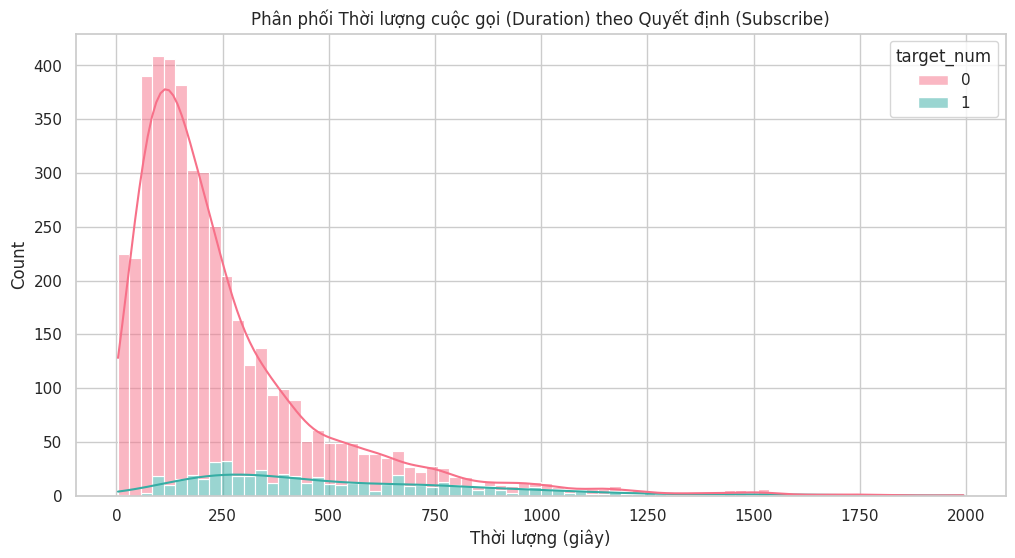

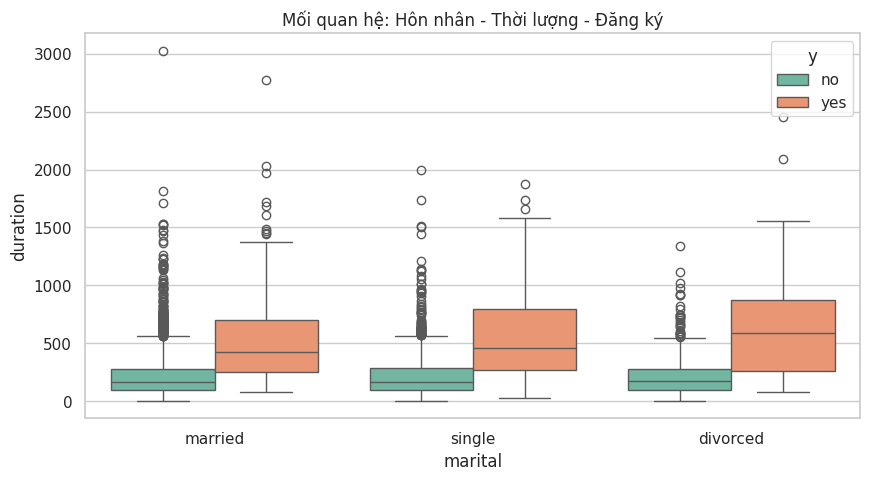

In [5]:
#câu 3 trang 28
print("Nguyễn Đức Trung _ 6351071072")
plt.figure(figsize=(12, 6))
data_plot = df[df['duration'] < 2000]
sns.histplot(
    data=data_plot,
    x='duration',
    hue='target_num', # 0: No, 1: Yes
    multiple='stack',
    kde=True,
    palette='husl'
)
plt.title('Phân phối Thời lượng cuộc gọi (Duration) theo Quyết định (Subscribe)')
plt.xlabel('Thời lượng (giây)')
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x='marital', y='duration', hue=target_col, data=df, palette='Set2')
plt.title('Mối quan hệ: Hôn nhân - Thời lượng - Đăng ký')
plt.show()